## Vědecká knihovna SciPy
Rozšířené funkce pro vědecké výpočty a numerickou analýzu

- staví na NumPy
- několik modulů
    - algoritmy pro clusterové výpočty
    - fyzikální a matematické konstanty
    - Fourierova transformace
    - integrace a obyčejné diferenciální funkce
    - interpolace
    - import a export dat z Matlabu
    - lineární algebra
    - zpracování signálu a obrazu
    - regrese
    - optimalizace a hledání kořenů
    - řídké matice
    - prostorové datové struktury
    - speciální funkce
    - statistika

https://docs.scipy.org/doc/scipy/tutorial/general.html

In [ ]:
!python -m pip install scipy

In [2]:
import scipy

## Modul Special

Např. Besselovy funkce v modulu scipy.special

In [3]:
import scipy.special
n = 0    # order
x = 0.0

# Bessel function of first kind
print("J_%d(%f) = %f" % (n, x, scipy.special.jn(n, x)))

x = 1.0
# Bessel function of second kind
print("Y_%d(%f) = %f" % (n, x, scipy.special.yn(n, x)))

J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257


In [ ]:
!python -m pip install matplotlib

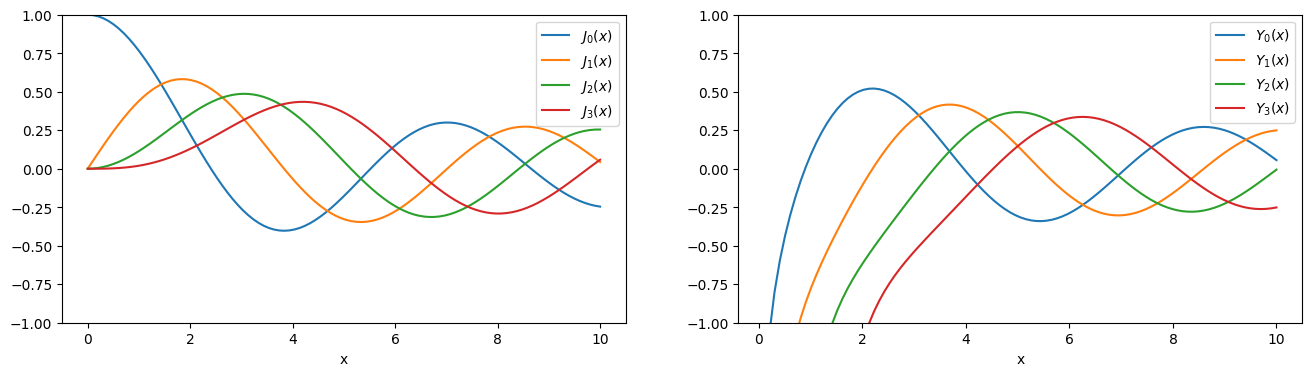

In [6]:
import numpy
import matplotlib.pyplot as plt
x = numpy.linspace(0, 10, 100)

fig, ax = plt.subplots(1, 2, figsize=(16,4))
for i, (func, label) in enumerate(zip((scipy.special.jn, scipy.special.yn), (r"$J_%d(x)$", r"$Y_%d(x)$"))):
    for n in range(4):
        ax[i].plot(x, func(n, x), label=label % n)
    ax[i].legend(loc="best")
    ax[i].set_xlabel("x")
    ax[i].set_ylim(-1, 1)

## Numerická derivace
např. $f(x)=2x/(1-x^2)$ v bodě $x=3$

In [15]:
import scipy.optimize                   # pův. scipy.misc.derivative zastaralá
def f(x):                               # definice funkce
    return (2*x) / (1-(x**2))

result = scipy.optimize.approx_fprime(3, f)             # funkce, v bodě, diference
# result = scipy.scipy.misc.derivative(f, 3, dx=1e-6)   # zastaralé
print(result)
print(scipy.optimize.approx_fprime(3, f, 1e-2))         # menší přesnost


[0.3125]
[0.31110036]


## Numerická integrace
- určitý integrál
- řešení obyčejných diferenciálních rovnic

In [1]:
import scipy.integrate as integrate
result = integrate.quad(lambda x: 4, 0, 2)  # konstantní funkce y = 4, integrace od 0 do 2
# (Fortran library QUADPACK)
print(result)
result = integrate.quad(lambda x: x, 0, 2)  # lineární funkce y = x, integrace od 0 do 2
print(result)                               # výsledek, chyba

(8.0, 8.881784197001252e-14)
(2.0, 2.220446049250313e-14)


Možnost integrovat s nevlastními mezemi

In [7]:
import numpy as np
val, abserr = integrate.quad(lambda x: np.exp(-x ** 2), -np.inf, np.inf)
print(f"výsledek = {val:g} ± {abserr:.2g}")
print(f"rozdíl od přesné hodnoty (√π) = {val - np.sqrt(np.pi):g}")

výsledek = 1.77245 ± 1.4e-08
rozdíl od přesné hodnoty (√π) = 0


Dvojný integrál

In [17]:
import scipy.integrate, math
def funkce(x, y):
    return (x**2) * y * (math.exp(x*y))
result = scipy.integrate.dblquad(funkce, 0, 2, 0, 1)      # x od 0 do 2, y od 0 do 1
result

(2.0, 3.526464691694632e-14)

## Interpolace a aproximace

In [5]:
from scipy.interpolate import interp1d, CubicSpline
import numpy

In [18]:
x = numpy.linspace(0, 10, num=11, endpoint=True)    # body 0 až 10
y = numpy.cos(-x**2/9.0)                            # pole funkčních hodnot
f_l = interp1d(x, y)                                # lineární interpolace
f_c = interp1d(x, y, kind='cubic')                  # kubická

display(y)
f_l(x)

array([ 1.        ,  0.99383351,  0.90284967,  0.54030231, -0.20550672,
       -0.93454613, -0.65364362,  0.6683999 ,  0.67640492, -0.91113026,
        0.11527995])

array([ 1.        ,  0.99383351,  0.90284967,  0.54030231, -0.20550672,
       -0.93454613, -0.65364362,  0.6683999 ,  0.67640492, -0.91113026,
        0.11527995])

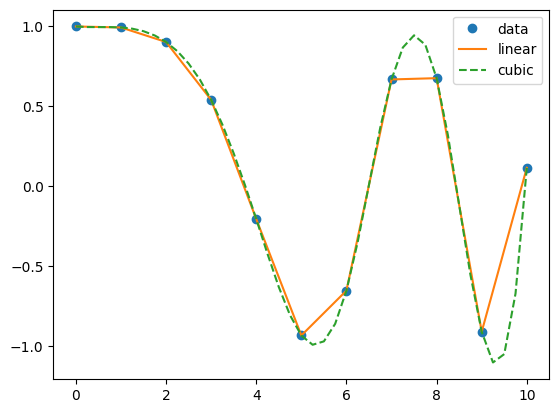

In [19]:
xnew = numpy.linspace(0, 10, num=41, endpoint=True)     # jemnější dělení
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f_l(xnew), '-', xnew, f_c(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

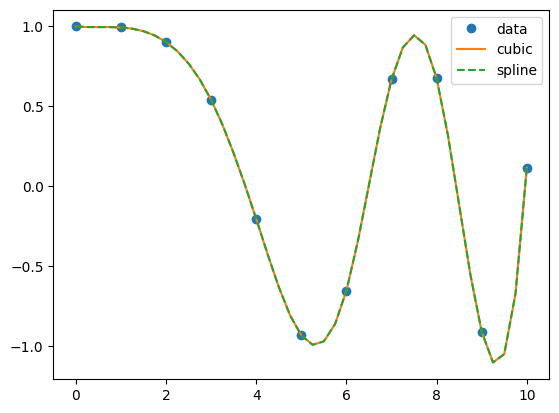

In [ ]:
# spline s možností explicitního nastavení okrajových podmínek
f_s = CubicSpline(x, y)                     # kubický spline
plt.plot(x, y, 'o', xnew, f_c(xnew), '-', xnew, f_s(xnew), '--')
plt.legend(['data', 'cubic', 'spline'], loc='best')
plt.show()

#### Aproximace

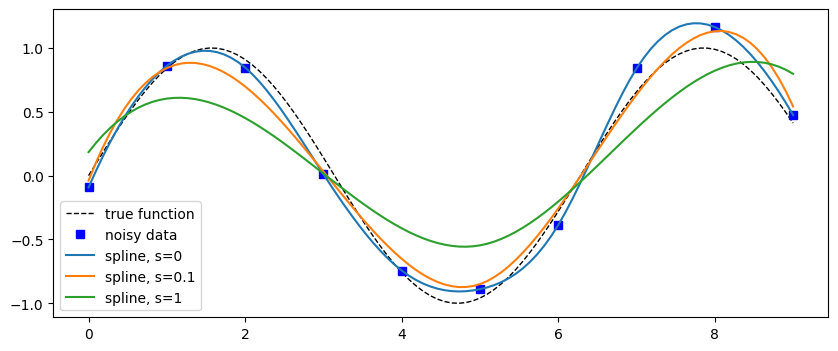

In [40]:
import scipy
def f(x):
    return np.sin(x)
x = np.linspace(0, 9, 100)
n = np.linspace(x[0], x[-1], 10)

y_meas = f(n) + 0.1 * np.random.randn(len(n))  # simulate measurement with noise
y_real = f(x)

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x, y_real, 'k--', lw=1, label='true function')
ax.plot(n, y_meas, 'bs', label='noisy data')
for s in (0, 0.1, 1):        # (0, 0.05, 0.1)
    spline_interpolation = scipy.interpolate.UnivariateSpline(n, y_meas, k=3, s=s)
    y_spline = spline_interpolation(x)

    ax.plot(x, y_spline, label=f'spline, s={s}')
ax.legend(loc=3);

#### Fit pomocí nejmenších čtverců
Máme předem danou funkci s neznámými parametry
- hledáme parametry

In [43]:
import scipy.optimize
# předpokládáná funkce, a,b,c jsou neznámé parametry
def f_fit(x, a, b, c):
    return a*np.sin(b*x + c)

výsledek: 1.07 * sin(1.02 * x -0.104)


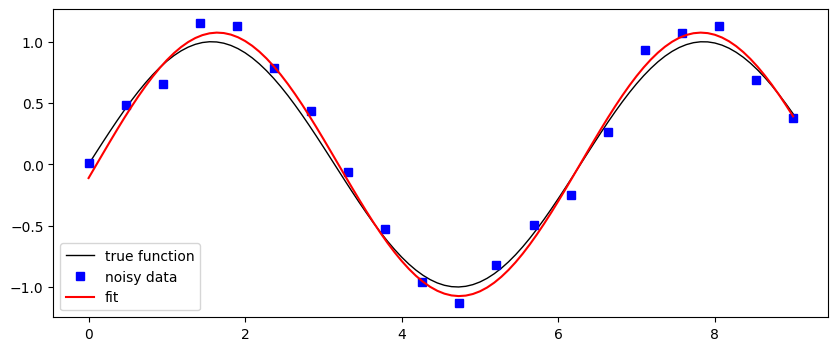

In [46]:
x = np.linspace(0, 9, 100)
n = np.linspace(x[0], x[-1], 20)
y_meas = np.sin(n) + 0.1 * np.random.randn(len(n))  # simulate measurement with noise
y_real = np.sin(x)
# počáteční odhad parametrů
guess = [1.3, 0.7, 1]
params, params_covariance = scipy.optimize.curve_fit(f_fit, n, y_meas, guess)
print('výsledek: {:.3g} * sin({:.3g} * x {:+.3g})'.format(*params))

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x, y_real, 'k', lw=1, label='true function')
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, f_fit(x, *params), 'r', label='fit')
ax.legend(loc=3);

#### Interpolace v bodě

In [ ]:
import numpy as np
# Definice časových bodů a příslušných cen
casove_body = [1, 2]            # Časové body
ceny_produktu = [100, 150]      # Ceny produktu odpovídající časovým bodům
cilovy_casovy_bod = 1.5         # Bod, pro který chceme provést interpolaci ceny

# Lineární interpolace
cilova_cena = np.interp(cilovy_casovy_bod, casove_body, ceny_produktu)
print(f"Interpolovaná cena produktu v časovém bodě {cilovy_casovy_bod} je {cilova_cena} Kč.")

Interpolovaná cena produktu v časovém bodě 1.5 je 125.0 Kč.


## Lineární algebra


In [21]:
import numpy
from scipy import linalg
A = numpy.array([[1,3,5],[2,5,1],[2,3,8]])
print(A)
linalg.inv(A), numpy.linalg.inv(A)          # stejné výsledky, ale scipy optimalizace

[[1 3 5]
 [2 5 1]
 [2 3 8]]


(array([[-1.48,  0.36,  0.88],
        [ 0.56,  0.08, -0.36],
        [ 0.16, -0.12,  0.04]]),
 array([[-1.48,  0.36,  0.88],
        [ 0.56,  0.08, -0.36],
        [ 0.16, -0.12,  0.04]]))

In [22]:
A @ linalg.inv(A)

array([[ 1.00000000e+00, -1.11022302e-16,  4.85722573e-17],
       [ 3.05311332e-16,  1.00000000e+00,  7.63278329e-17],
       [ 2.22044605e-16, -1.11022302e-16,  1.00000000e+00]])

Řešení lineárních soustav

In [23]:
A = numpy.array([[1, 2], [3, 4]])
A

array([[1, 2],
       [3, 4]])

In [24]:
b = numpy.array([[5], [6]])
b

array([[5],
       [6]])

In [25]:
from scipy import linalg
linalg.inv(A).dot(b)                    # řešení rovnic pomalé, i když scipy
#display(linalg.inv(A)@b)                # totéž

array([[-4. ],
       [ 4.5]])

In [26]:
A.dot(linalg.inv(A).dot(b)) - b         # kontrola

array([[0.],
       [0.]])

In [27]:
print(numpy.linalg.solve(A, b))         # rychlé, i když numpy
print(linalg.solve(A, b) )              # rychlé (scipy)

[[-4. ]
 [ 4.5]]
[[-4. ]
 [ 4.5]]


In [28]:
A.dot(numpy.linalg.solve(A, b)) - b     # kontrola

array([[0.],
       [0.]])

Výpočet deteminantu

In [29]:
from scipy import linalg
A = numpy.array([[1,2],[3,4]])
print(A)
linalg.det(A)                           # opět jako numpy

[[1 2]
 [3 4]]


np.float64(-2.0)

## Statistika

In [32]:
import numpy as np
from scipy import stats

# Střední hodnota a rozptyl pro skupiny A (lék) a B (placebo)
prumer_A = 195
prumer_B = 200
rozptyl = 20
osob = 10

# Generování dat pro skupiny A a B (normální rozdělení)
np.random.seed(0)           # pro reprodukovatelnost
skupina_A = np.random.normal(loc=prumer_A, scale=np.sqrt(rozptyl), size=osob)
skupina_B = np.random.normal(loc=prumer_B, scale=np.sqrt(rozptyl), size=osob)

# Provedení t-testu
t_statistika, p_hodnota = stats.ttest_ind(skupina_A, skupina_B)
print(t_statistika, p_hodnota)
# Provedení analýzy rozptylu (ANOVA)
statistika2, p_hodnota2 = stats.f_oneway(skupina_A, skupina_B)
print(statistika2, p_hodnota2)

# Interpretace výsledků
alpha = 0.05                # hladina významnosti
if p_hodnota < alpha:
    print("Rozdíl v obou skupinách je statisticky významný.")
else:
    print("Rozdíl v obou skupinách není statisticky významný.")

-1.9873559160858973 0.06231638121078746
3.9495835372015913 0.06231638121078817
Rozdíl v obou skupinách není statisticky významný.


In [34]:
from scipy.stats import norm
print(norm.pdf(0))  # Probability Density Function
norm.cdf(0)         # Cumulative Distribution Function

0.3989422804014327


np.float64(0.5)

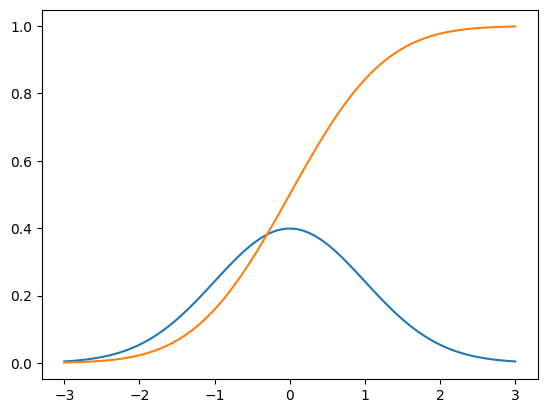

In [35]:
import matplotlib.pyplot as plt
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = numpy.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), x, norm.cdf(x, mu, sigma))
plt.show()

## Diferenciální rovnice

Nutno vyjádřit
$$\frac{dy}{dt} = f(y, t, ...)$$

Potom

$y = odeint(f, y0, x)$, kde parametry jsou funkce, poč. bod, pole x

Řešme rovnici 

$$ y^{\prime} = x$$
$$~~y(x_0) = 2,  x_0 = 0$$



x:[0 1 2 3 4 5 6 7 8 9]
y: 2.0 2.5 4.0 6.5 10.0 14.5 20.0 26.5 34.0 42.5


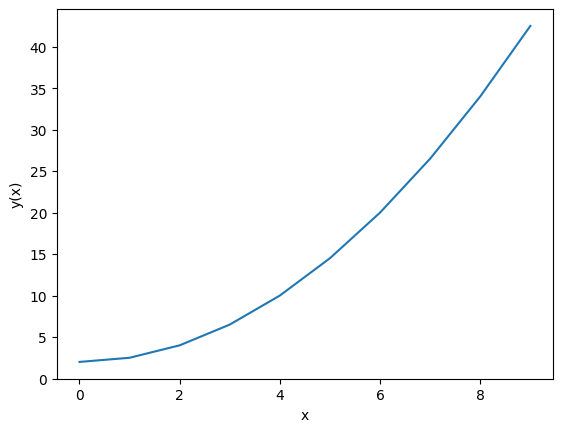

In [17]:
# numericky pomocí scipy
from scipy.integrate import odeint
import matplotlib.pyplot as plt

f = lambda y, x: x                      # funkce y a x, vrací x (rovnice y'= x)
#def f(y, x):                           # totéž
#    return x

x0 = 0
y0 = 2
xmax = 10
dx = 1

x = np.arange(x0, xmax, dx)
y = odeint(f, y0, x)                    # funkce, poč. bod, pole x

print(f"x:{x}")
# výpis do jednoho řádku - jedná se o svislé pole
print("y:", " ".join(f"{value[0]:2.1f}" for value in y))
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()